In [ ]:
#import sys
#!{sys.executable} -m pip install opencv-python
#!{sys.executable} -m pip install webcolors

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import cv2
import webcolors
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76## calculating similarities
import os

%matplotlib inline

Type of Image that we have read <class 'numpy.ndarray'>
Shape of that Image: (600, 160, 3)


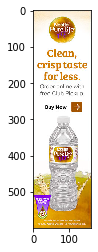

In [2]:
## Read the file 
image = cv2.imread('imgad.jpg')
print("Type of Image that we have read {}".format(type(image)))
print("Shape of that Image: {}".format(image.shape))
plt.imshow(image)

Shape of read image: (600, 160, 3)


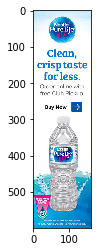

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Shape of read image: {}".format(image.shape))
plt.imshow(image)

Shape: (600, 160, 3)


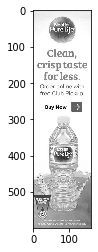

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Shape: {}".format(image.shape))
plt.imshow(gray_image, cmap='gray')

Shape: (3000, 1000, 3)


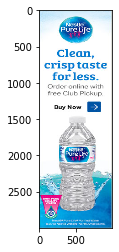

In [5]:
## Checking size of images
resized_image = cv2.resize(image, (1000, 3000))
print("Shape: {}".format(resized_image.shape))
plt.imshow(resized_image)

In [5]:
## RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
## Read image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    ## resize the image to reduce the time needed to extract the colors from the image
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #plt.imshow(modified_image)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    #print(pd.value_counts(labels))
    counts = Counter(labels)
    #print(counts)
    
    center_colors = clf.cluster_centers_
    #print(center_colors)
    # We get ordered colors by iterating through the keys
    
    ##RGB (Red, Green, Blue) are 8 bit each.
    ##The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
    ##The combination range is 256*256*256.
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors , colors = ordered_colors)
    
    color_names = [get_colour_name((int(color[0]),int(color[1]),int(color[2]))) for color in rgb_colors]
    
    
    return rgb_colors,color_names

In [8]:
## Color Name
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name

([array([233.94690461, 236.83466105, 240.14661844]),
  array([ 48.32282454, 134.35632328, 188.47123648])],
 ['lavender', 'steelblue'])

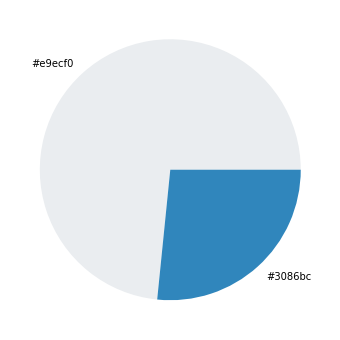

In [12]:
get_colors(get_image('imgad.jpg'), 2, True)